<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Mothi_Gowtham_bootcamp_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Download and prepare the data**

In [44]:
housing = pd.read_csv("https://github.com/ageron/data/raw/main/housing/housing.csv")

In [45]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# **Examining Ocean_Promximity in housing data**

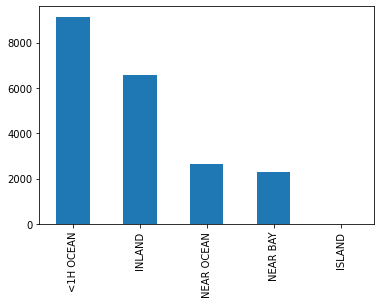

In [6]:
housing["ocean_proximity"].value_counts().plot(kind="bar")

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **Data Visualization**

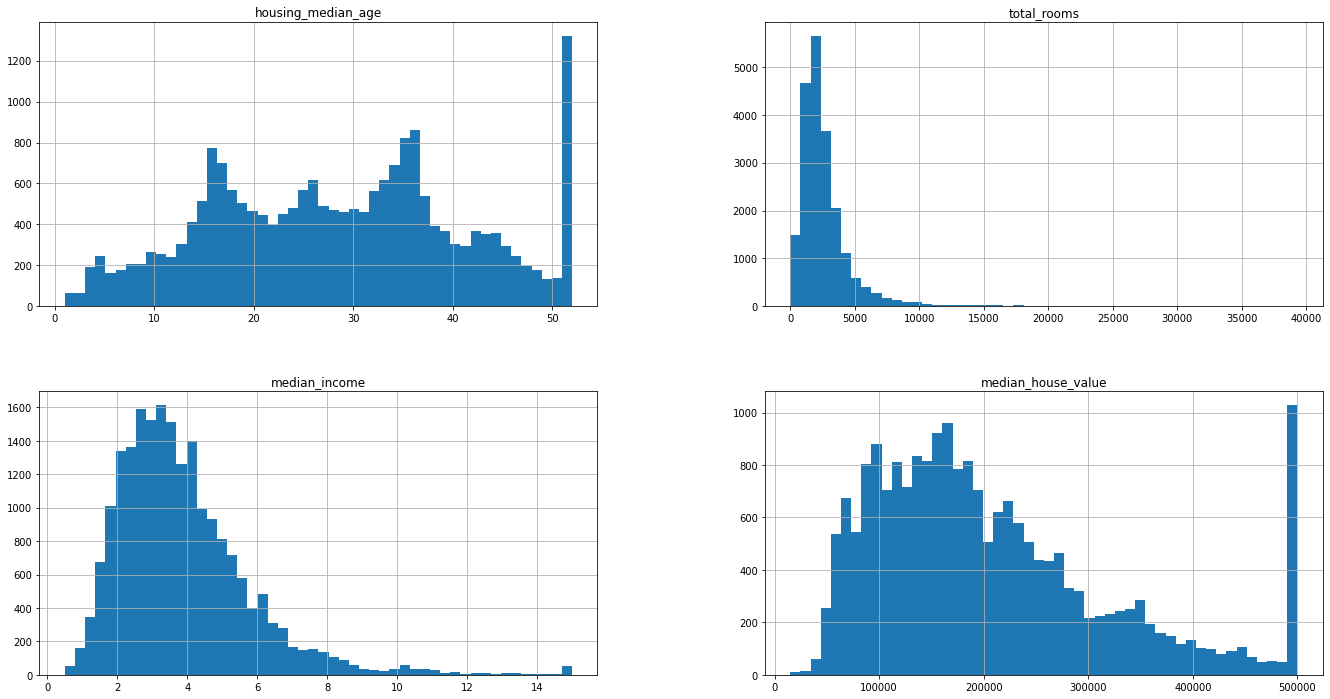

In [84]:
housing.hist(bins = 50, figsize = (23,12))
plt.show()

# **Making median income categories**

In [12]:
housing["income_cat"] = pd.cut(housing['median_income'],
                               bins = [0, 1.5, 3, 4.5, 6, np.inf],
                               labels = [1,2,3,4,5])

housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

# **Normality testing**

In [18]:
import scipy.stats as stats
stats.normaltest(housing['median_house_value'])

NormaltestResult(statistic=2430.931051066071, pvalue=0.0)

Since pvalue is 0 (<0.05), the data for the column "median_hous_value" is not normally distributed. Non-parametric test has to be done for hypothesis testing.

# **Correlation**

In [21]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

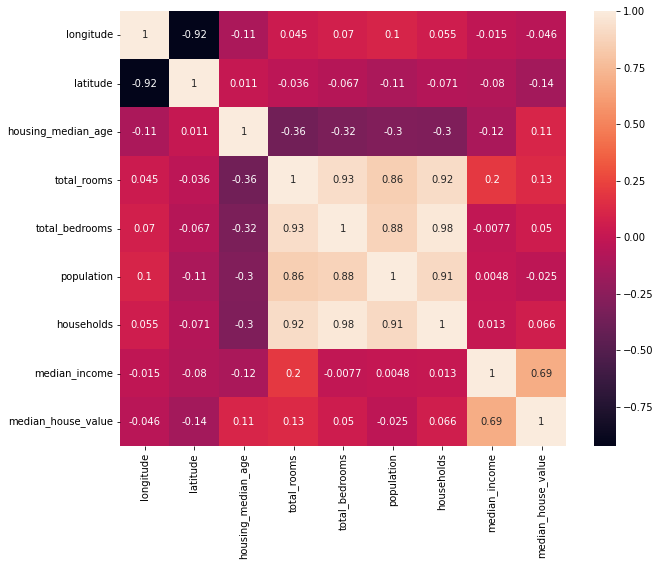

In [27]:
plt.subplots(figsize = (10, 8))
sns.heatmap(housing.corr(), annot=True)
plt.show()

# **CHI SQUARE TEST**

In [86]:
#HYPOTHESIS- Median_house_value comes from a normal distribution.


from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(housing['median_house_value'], housing['median_income'])
chi, pval, dof, exp_val = chi2_contingency(contingency_table)
print('chi-square stat:', chi,
      '\npvalue:', pval,
      '\nDegree of freedom:', dof,
      '\nexpected values:', exp_val)

chi-square stat: 53276770.92236957 
pvalue: 0.0 
Degree of freedom: 49652607 
expected values: [[2.32558140e-03 1.93798450e-03 1.93798450e-04 ... 1.93798450e-04
  3.87596899e-04 9.49612403e-03]
 [5.81395349e-04 4.84496124e-04 4.84496124e-05 ... 4.84496124e-05
  9.68992248e-05 2.37403101e-03]
 [2.32558140e-03 1.93798450e-03 1.93798450e-04 ... 1.93798450e-04
  3.87596899e-04 9.49612403e-03]
 ...
 [5.81395349e-04 4.84496124e-04 4.84496124e-05 ... 4.84496124e-05
  9.68992248e-05 2.37403101e-03]
 [1.56976744e-02 1.30813953e-02 1.30813953e-03 ... 1.30813953e-03
  2.61627907e-03 6.40988372e-02]
 [5.61046512e-01 4.67538760e-01 4.67538760e-02 ... 4.67538760e-02
  9.35077519e-02 2.29093992e+00]]


Hypothesis: median_house_value and median_income are independent. Since pvalue is 0, the null hypothesis is rejected. Therefore there is no statistical difference between the two.

In [41]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [46]:
housing.drop(columns = ['households', 'total_bedrooms','ocean_proximity','population','longitude','latitude'], inplace=True)
housing

,housing_median_age,total_rooms,median_income,median_house_value
0,41.0,880.0,8.3252,452600.0
1,21.0,7099.0,8.3014,358500.0
2,52.0,1467.0,7.2574,352100.0
3,52.0,1274.0,5.6431,341300.0
4,52.0,1627.0,3.8462,342200.0
...,...,...,...,...
20635,25.0,1665.0,1.5603,78100.0
20636,18.0,697.0,2.5568,77100.0
20637,17.0,2254.0,1.7000,92300.0
20638,18.0,1860.0,1.8672,84700.0


In [47]:
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]
X

,housing_median_age,total_rooms,median_income
0,41.0,880.0,8.3252
1,21.0,7099.0,8.3014
2,52.0,1467.0,7.2574
3,52.0,1274.0,5.6431
4,52.0,1627.0,3.8462
...,...,...,...
20635,25.0,1665.0,1.5603
20636,18.0,697.0,2.5568
20637,17.0,2254.0,1.7000
20638,18.0,1860.0,1.8672


# **Spliting data for testing and training**

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train

,housing_median_age,total_rooms,median_income
14196,34.0,6001.0,4.5878
8267,10.0,901.0,4.6648
17445,28.0,6909.0,3.6875
14265,25.0,4021.0,5.1663
2271,8.0,240.0,1.4688
...,...,...,...
11284,49.0,969.0,1.3167
11964,35.0,1778.0,6.5745
5390,16.0,2624.0,2.1250
860,22.0,2467.0,2.6536


# **Modelling**

In [55]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
prediction = lm.predict(x_test)

In [63]:
import sklearn as skl

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.5117216144816561
0.5204051069635551


In [68]:
print(model.intercept_)
print(model.coef_)

-22280.24779064211
[1.94815741e+03 3.96330066e+00 4.19928439e+04]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


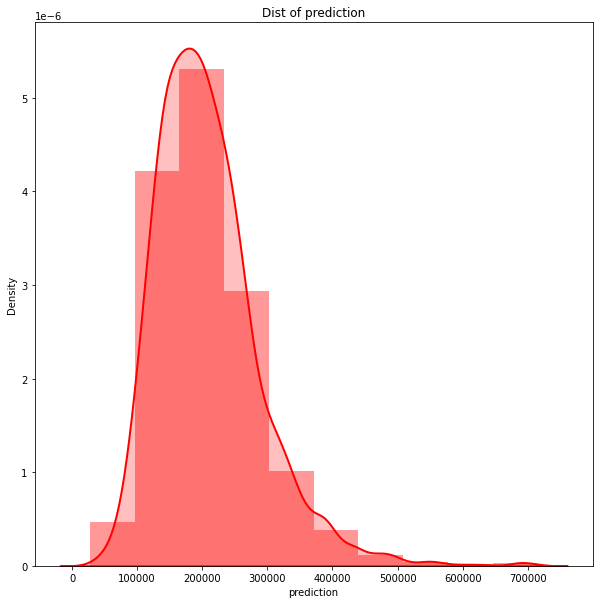

In [78]:
#checking the distribution of prediction
# plotting the original data(non-normal) and
# fitted data (normal)

plt.subplots(figsize = (10, 10))

sns.distplot(prediction, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red",bins=10)

plt.title('Dist of prediction')
plt.xlabel('prediction')
plt.show()

In [80]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, prediction)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test,prediction) 
mape = metrics.mean_absolute_percentage_error(y_test, prediction)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("MAPE:",mape)

Results of sklearn.metrics:
MAE: 60868.41312957058
MSE: 6648418089.566239
RMSE: 81537.83225942568
R-Squared: 0.5204051069635551
MAPE: 0.3688247616715809


In [81]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [82]:
y_pred = regressor.predict(x_test)

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.12167818728097013

# **Random Forest Regressor**

# **Model Evaluation**